***Problem Statement***: One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

***ML Problem***: With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

***Target Variable***: `persistency_flag`  

***Task***:

- Problem understanding   
- Data Understanding  
- Data Cleaning and Feature engineering  
- Model Development  
- Model Selection  
- Model Evaluation  
- Report the accuracy, precision and recall of both the class of target variable  
- Report ROC-AUC as well  
- Deploy the model  
- Explain the challenges and model selection  

## Feature Description

| Bucket                   | Variable                            | Variable Description                                                                                                                                                                                                                                                                         |
|--------------------------|-------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unique Row Id            | Patient ID                          | Unique ID of each patient                                                                                                                                                                                                                                                                    |
| Target Variable          | Persistency_Flag                    | Flag indicating if a patient was persistent or not                                                                                                                                                                                                                                           |
| Demographics             | Age                                 | Age of the patient during their therapy                                                                                                                                                                                                                                                      |
|                          | Race                                | Race of the patient from the patient table                                                                                                                                                                                                                                                   |
|                          | Region                              | Region of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | Ethnicity                           | Ethnicity of the patient from the patient table                                                                                                                                                                                                                                              |
|                          | Gender                              | Gender of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | IDN Indicator                       | Flag indicating patients mapped to IDN                                                                                                                                                                                                                                                       |
| Provider Attributes      | NTM - Physician Specialty           | Specialty of the HCP that prescribed the NTM Rx                                                                                                                                                                                                                                              |
| Clinical Factors         | NTM - T-Score                       | T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)                                                                                                                                                                                                          |
|                          | Change in T Score                   | Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                                  |
|                          | NTM - Risk Segment                  | Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate)                                                                                                                                                                                                |
|                          | Change in Risk Segment              | Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                             |
|                          | NTM - Multiple Risk Factors         | Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)                                                                                                                                       |
|                          | NTM - Dexa Scan Frequency           | Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)                                                                                                                                                                                                |
|                          | NTM - Dexa Scan Recency             | Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)                                                                                                                |
|                          | Dexa During Therapy                 | Flag indicating if the patient had a Dexa Scan during their first continuous therapy                                                                                                                                                                                                         |
|                          | NTM - Fragility Fracture Recency    | Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate)                                                                                                                                                                                           |
|                          | Fragility Fracture During Therapy   | Flag indicating if the patient had fragility fracture  during their first continuous therapy                                                                                                                                                                                                 |
|                          | NTM - Glucocorticoid Recency        | Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx                                                                                                                                                                                  |
|                          | Glucocorticoid Usage During Therapy | Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy                                                                                                                                                                                                |
| Disease/Treatment Factor | NTM - Injectable Experience         | Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx                                                                                                                                                                                                       |
|                          | NTM - Risk Factors                  | Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx                                                                                                     |
|                          | NTM - Comorbidity                   | Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied |
|                          | NTM - Concomitancy                  | Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)                                                                                                                                                                                         |
|                          | Adherence                           | Adherence for the therapies                                                                                                                                                                                                                                                                  |

### Additional Research

- Nontuberculous mycobacterial (NTM)
- A DEXA scan is an imaging test that measures bone density (strength). DEXA scan results can provide helpful details about your risk for osteoporosis (bone loss) and fractures (bone breaks). This test can also measure your body composition, such as body fat and muscle mass. (https://my.clevelandclinic.org/health/diagnostics/10683-dexa-dxa-scan-bone-density-test)

### Initial Hypothesis:
A (recent) history of medical intervention beyond the general practitioner/annual exams will be predictive of adherance.

## EDA

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
# initial cleaning identified Ptid as the index 
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')
df.columns = df.columns.str.lower()

In [50]:
df.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,...,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [51]:
df.tail()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,...,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


There are 69 fields, far too many to break out here, but they are binned in the following categories:
- Unique Row Id  
- Target Variable
- Demographics  
- Provider Attributes  
- Clinical Factors  
- Disease/Treatment Factor

In [52]:
df.isna().sum().any() # false

False

In [53]:
# Find all the categorical variables
all(df.dtypes=='uint8')

False

### Missing Data

#### Missing Data Indicators

There are several indicators for missing values.  Some are truly missing (NaNs) while others are a real category (such as `Specialist` vs `Other`).  Let's dig into that now.

In [54]:
missing_data_identifiers = []

In [55]:
df.persistency_flag.value_counts()

Non-Persistent    2135
Persistent        1289
Name: persistency_flag, dtype: int64

In [56]:
df.gender.value_counts() # All patients are assigned a gender

Female    3230
Male       194
Name: gender, dtype: int64

In [57]:
df.race.value_counts() # Some patient's race is Unknown or Other.  We'll treat these as all Unknown

Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: race, dtype: int64

In [58]:
missing_data_identifiers.append('Other/Unknown')
missing_data_identifiers.append('Others')	
missing_data_identifiers.append('OB/GYN/Others/PCP/Unknown')

In [59]:
df.ethnicity.value_counts()  # Some patient's ethnicity is Unknown 

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: ethnicity, dtype: int64

In [60]:
missing_data_identifiers.append('Unknown')

In [61]:
df.region.value_counts() # Some patient's region is Unknown or Other.  We'll treat these as all Unknown

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: region, dtype: int64

In [62]:
df.age_bucket.value_counts() # No missing or UNK values

>75      1439
65-75    1086
55-65     733
<55       166
Name: age_bucket, dtype: int64

In [63]:
df.ntm_specialist_flag.value_counts() # I do not see this as unknown.  Simply an indicator that it was either Specialist or not

Others        2013
Specialist    1411
Name: ntm_specialist_flag, dtype: int64

***ACTION*** `ntm_specialist_flag` will be highly correlated with `ntm_specialty`.  Drop `ntm_specialist_flag`

***ACTION*** Drop rows with NaN's totalling less than 5% of the total dataset

Now let's check out the `clinical factors` which all appear to be binary 

In [64]:
df.iloc[:, 9:].isna().sum().sort_values().sum() # no missing values in the clinical factors columns

0

In [65]:
# Here are all the NaN indicators
missing_data_identifiers

['Other/Unknown', 'Others', 'OB/GYN/Others/PCP/Unknown', 'Unknown']

#### Reimport the dataset with our new information

In [66]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset', index_col='Ptid', na_values=missing_data_identifiers)
df.columns = df.columns.str.lower()
df.index.names = ['ptid'] # index to lowercase

In [67]:
df.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,...,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
ptid,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,NaN,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,NaN,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,NaN,NaN,N,...,N,Y,N,N,N,N,N,N,N,2
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,NaN,NaN,N,...,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,NaN,NaN,Y,...,N,N,N,N,N,N,N,N,N,1


### Handle the Missing Data

#### Implement previously-identified actions

##### `ntm_specialist_flag` will be highly correlated with `ntm_specialty`.  Drop `ntm_specialist_flag`

In [68]:
df.drop(['ntm_specialist_flag'], axis = 1, inplace=True)
'ntm_specialist_flag' not in df.columns

True

##### Drop rows with NaN's totalling less than 5% of the total dataset

In [69]:
# lets find fields with less than 5% NaN counts 
filter = (df.isna().sum().sort_values(ascending=False)/df.shape[0])
filter[(filter > 0) & (filter <0.05)]

fields_w_nans_todrop = filter[(filter > 0) & (filter <0.05)].index.to_list()
print(f'Dropping any row with NaNs in these fields: {fields_w_nans_todrop}')

nrows_deleted = df[fields_w_nans_todrop].isna().any(axis=1).sum()
print(f'Total number of rows to be dropped: {nrows_deleted}')

Dropping any row with NaNs in these fields: ['race', 'ethnicity', 'region']
Total number of rows to be dropped: 222


In [70]:
baseline = df.shape[0]
print (f'Original: {baseline}')
df = df.dropna(subset=fields_w_nans_todrop)
change = df.shape[0]
print (f'New: {change}')
if(baseline - change == nrows_deleted): print('VERIFIED')

Original: 3424
New: 3202
VERIFIED


#### Remaining Missing Values

In [71]:
# now lets look the rest of the fields with NaNs
filter = (df.isna().sum().sort_values(ascending=False)/df.shape[0])
nans = filter[(filter > 0.01)].index.tolist()
nans

['change_risk_segment',
 'ntm_speciality_bucket',
 'tscore_bucket_during_rx',
 'risk_segment_during_rx',
 'change_t_score',
 'ntm_speciality']

Let's compare how the proportions of persistent and non-persistent patients with respect to each of these fields

In [72]:
for col in nans:
    print (col)
    temp_df = (df.groupby(["persistency_flag", col], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size())

    print (f"\t{'Non-Persistent'}:\t{temp_df.loc[pd.IndexSlice[('Non-Persistent')]][-1]:.2f}")
    print (f"\t{'Persistent'}:\t{temp_df.loc[pd.IndexSlice[('Persistent')]][-1]:.2f}")

change_risk_segment
	Non-Persistent:	0.68
	Persistent:	0.60
ntm_speciality_bucket
	Non-Persistent:	0.67
	Persistent:	0.52
tscore_bucket_during_rx
	Non-Persistent:	0.50
	Persistent:	0.32
risk_segment_during_rx
	Non-Persistent:	0.50
	Persistent:	0.32
change_t_score
	Non-Persistent:	0.50
	Persistent:	0.32
ntm_speciality
	Non-Persistent:	0.10
	Persistent:	0.08


##### `change_risk_segment`

Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)

In [73]:
df.change_risk_segment.value_counts(dropna=False)

NaN          2079
No change     990
Worsened      113
Improved       20
Name: change_risk_segment, dtype: int64

In [74]:
df.groupby(["persistency_flag", "change_risk_segment"], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size()

persistency_flag  change_risk_segment
Non-Persistent    Improved               0.004012
                  No change              0.295386
                  Worsened               0.022568
                  NaN                    0.678034
Persistent        Improved               0.009934
                  No change              0.331954
                  Worsened               0.056291
                  NaN                    0.601821
dtype: float64

There are too many missing values to consider imputation.   

***CONSIDER** t test to evaluate significant difference in mean

***ACTION*** Drop the `change_risk_segment` column

##### `ntm_speciality_bucket`

"Specialty of the HCP that prescribed the NTM Rx "

In [75]:
df.ntm_speciality_bucket.value_counts(dropna=False)

NaN             1973
Endo/Onc/Uro     673
Rheum            556
Name: ntm_speciality_bucket, dtype: int64

In [76]:
df.groupby(["persistency_flag", "ntm_speciality_bucket"], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size()

persistency_flag  ntm_speciality_bucket
Non-Persistent    Endo/Onc/Uro             0.155466
                  Rheum                    0.173019
                  NaN                      0.671515
Persistent        Endo/Onc/Uro             0.300497
                  Rheum                    0.174669
                  NaN                      0.524834
dtype: float64

This field is duplicative of the `ntm_specialty` field

***ACTION*** Drop `ntm_speciality_bucket`

##### `ntm_speciality`

In [77]:
temp_df = (df.groupby(["persistency_flag", 'ntm_speciality'], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size())

print (f"\t{'Non-Persistent'}:\t{temp_df.loc[pd.IndexSlice[('Non-Persistent')]][-1]:.2f}")
print (f"\t{'Persistent'}:\t{temp_df.loc[pd.IndexSlice[('Persistent')]][-1]:.2f}")

	Non-Persistent:	0.10
	Persistent:	0.08


With 10% and 8% NaNs in the Non-Persistent and Persistent bins respectively

***ACTION*** Impute NaNs in the `ntm_specialty` field with proportionate values

##### `change_t_score`, `risk_segment_during_rx`, and `tscore_bucket_during_rx`

In [78]:
df.change_t_score.isna().sum()

1393

In [79]:
# make sure the patient IDs match
df[df.change_t_score.isna() & df.tscore_bucket_during_rx.isna() & df.risk_segment_during_rx.isna()].shape[0] == df.change_t_score.isna().sum()

True

In [80]:
first = "risk_segment_during_rx" #"tscore_bucket_prior_ntm"
second = "change_t_score"

df.groupby([first, second], dropna=False).size() #/ df.groupby([first], dropna=False).size()

risk_segment_during_rx  change_t_score
HR_VHR                  Improved            29
                        No change          763
                        Worsened           116
VLR_LR                  Improved            62
                        No change          793
                        Worsened            46
NaN                     NaN               1393
dtype: int64

In [81]:
first = "risk_segment_during_rx" #"tscore_bucket_prior_ntm"
second = "tscore_bucket_during_rx"

df.groupby([first, second], dropna=False).size() #/ df.groupby([first], dropna=False).size()

risk_segment_during_rx  tscore_bucket_during_rx
HR_VHR                  <=-2.5                      805
                        >-2.5                       103
VLR_LR                  <=-2.5                      146
                        >-2.5                       755
NaN                     NaN                        1393
dtype: int64

In [82]:
first = "persistency_flag" #"tscore_bucket_prior_ntm"
second = "risk_segment_during_rx"

df.groupby([first, second], dropna=False).size() / df.groupby([first], dropna=False).size()

persistency_flag  risk_segment_during_rx
Non-Persistent    HR_VHR                    0.250251
                  VLR_LR                    0.247242
                  NaN                       0.502508
Persistent        HR_VHR                    0.338576
                  VLR_LR                    0.337748
                  NaN                       0.323675
dtype: float64

Because there are so many NaNs, let's encode a seperate field just for these: `no_t_risk_during_rx`

In [83]:
# df['no_t_risk_during_rx']
baseline = df.change_t_score.isna().sum()
df['no_t_risk_during_rx'] = np.where(df.change_t_score.isna(), 1, 0)
if(df.no_t_risk_during_rx.sum() == baseline): print('VERIFIED')

VERIFIED


***ACTION*** Change NaN values of `change_t_score`, `risk_segment_during_rx`, and `tscore_bucket_during_rx` to another category.  These will then be removed after onehot encoding

#### Observations

- `change_risk_segment`
    - 8% more NaN occurrence in the Non Persistent group
- `ntm_speciality_bucket`
    - 15% more NaN occurrence in the Non Persistent group
    - redundant, remove this field
- `ntm_speciality`
    - low occurrence and similar between persistency groups
- The following fields have identical rows with NaNs
        - `change_t_score`
        - `risk_segment_during_rx`
        - `tscore_bucket_during_rx`
    - There appears to be an association between `region` and measurements of tscores during therapy.  


In [84]:
first = "region" #"tscore_bucket_prior_ntm"
second = "tscore_bucket_during_rx"

df.groupby([first, second], dropna=False).size() / df.groupby([first], dropna=False).size()

region     tscore_bucket_during_rx
Midwest    <=-2.5                     0.283482
           >-2.5                      0.244048
           NaN                        0.472470
Northeast  <=-2.5                     0.425234
           >-2.5                      0.280374
           NaN                        0.294393
South      <=-2.5                     0.289474
           >-2.5                      0.259762
           NaN                        0.450764
West       <=-2.5                     0.296137
           >-2.5                      0.351931
           NaN                        0.351931
dtype: float64

#### Implement previously-identified actions

##### Drop the `change_risk_segment` column

In [85]:
df.drop('change_risk_segment', axis=1, inplace=True)

##### Drop the `ntm_speciality_bucket` colunmn

In [86]:
df.drop('ntm_speciality_bucket', axis=1, inplace=True)

##### Impute NaNs in the `ntm_speciality` field with the mode

In [87]:
df.ntm_speciality.fillna(df.ntm_speciality.mode().iloc[0], inplace=True)
df.ntm_speciality.isna().sum()

0

##### Change NaN values of `change_t_score`, `risk_segment_during_rx`, and `tscore_bucket_during_rx` to another category.  These will then be removed after onehot encoding

In [88]:
fields_to_change = ['change_t_score', 'risk_segment_during_rx', 'tscore_bucket_during_rx']
df[fields_to_change].isna().sum()

change_t_score             1393
risk_segment_during_rx     1393
tscore_bucket_during_rx    1393
dtype: int64

In [89]:
for field in fields_to_change:
    df[field].fillna('no_t_risk_during_rx', inplace=True)

In [90]:
df[fields_to_change].isna().sum()

change_t_score             0
risk_segment_during_rx     0
tscore_bucket_during_rx    0
dtype: int64

## Encoding and Validation

In [91]:
df.dtypes.value_counts()

object    63
int64      3
dtype: int64

In [92]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['dexa_freq_during_rx', 'count_of_risks', 'no_t_risk_during_rx'], object: ['persistency_flag', 'gender', 'race', 'ethnicity', 'region', 'age_bucket', 'ntm_speciality', 'gluco_record_prior_ntm', 'gluco_record_during_rx', 'dexa_during_rx', 'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm', 'tscore_bucket_prior_ntm', 'risk_segment_during_rx', 'tscore_bucket_during_rx', 'change_t_score', 'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx', 'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization', 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx', 'comorb_vitamin_d_deficiency', 'comorb_other_joint_disorder_not_elsewhere_classified', 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx', 'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia', 'comorb_personal_history_of_other_diseases_and_conditions', 'comorb_other_disorders_of_bone_density_and_structure', 'comorb_disorders_o

In [93]:
df.shape

(3202, 66)

In [94]:
df.race.value_counts()

Caucasian           3032
African American      89
Asian                 81
Name: race, dtype: int64

In [95]:
# count total fields
total = 0

for col in df.columns:
    if df[col].dtype == 'int64': 
        total += 1
    else:
        unique_vals = df[col].value_counts().size
        #print (f'{col}: {unique_vals}')
        total += unique_vals - 1
        #break
print (f'{total} expected fields')

107 expected fields


In [96]:
# hot encode categorical columns
#cat_df = pd.get_dummies(df[bin_columns], drop_first= True )
encoded_df = pd.get_dummies(df, drop_first= True )

# # drop categorical columns from original df
# df = df.drop(bin_columns, axis=1)

# # concat remaining columns with encoded columns
# df = pd.concat((df, cat_df), axis = 1)

# Now clean up column names
encoded_df.columns = encoded_df.columns.str.lower()
#cat_df.columns = [s[:-2] if s.endswith('_y') else s for s in cat_df.columns ]
#cat_df=cat_df.rename(columns = {'persistency_flag_persistent':'persistency_flag'})
encoded_df.head()

,dexa_freq_during_rx,count_of_risks,no_t_risk_during_rx,persistency_flag_persistent,gender_male,race_asian,race_caucasian,ethnicity_not hispanic,region_northeast,region_south,...,risk_chronic_liver_disease_y,risk_family_history_of_osteoporosis_y,risk_low_calcium_intake_y,risk_vitamin_d_insufficiency_y,risk_poor_health_frailty_y,risk_excessive_thinness_y,risk_hysterectomy_oophorectomy_y,risk_estrogen_deficiency_y,risk_immobilization_y,risk_recurring_falls_y
ptid,,,,,,,,,,,,,,,,,,,,,
P1,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
P2,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
P4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
P5,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
P6,0,2,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [97]:
encoded_df.shape # Expected fields

(3202, 107)

In [98]:
encoded_df.isna().sum().sum()

0

In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.concat((encoded_df.head(), df.tail()), axis = 0)

,dexa_freq_during_rx,count_of_risks,no_t_risk_during_rx,persistency_flag_persistent,gender_male,race_asian,race_caucasian,ethnicity_not hispanic,region_northeast,region_south,region_west,age_bucket_65-75,age_bucket_<55,age_bucket_>75,ntm_speciality_clinical nurse specialist,ntm_speciality_emergency medicine,ntm_speciality_endocrinology,ntm_speciality_gastroenterology,ntm_speciality_general practitioner,ntm_speciality_geriatric medicine,ntm_speciality_hematology & oncology,ntm_speciality_hospice and palliative medicine,ntm_speciality_hospital medicine,ntm_speciality_nephrology,ntm_speciality_neurology,ntm_speciality_nuclear medicine,ntm_speciality_obstetrics and gynecology,ntm_speciality_occupational medicine,ntm_speciality_oncology,ntm_speciality_ophthalmology,ntm_speciality_orthopedic surgery,ntm_speciality_orthopedics,ntm_speciality_otolaryngology,ntm_speciality_pain medicine,ntm_speciality_pathology,ntm_speciality_pediatrics,ntm_speciality_physical medicine and rehabilitation,ntm_speciality_plastic surgery,ntm_speciality_podiatry,ntm_speciality_psychiatry and neurology,ntm_speciality_pulmonary medicine,ntm_speciality_radiology,ntm_speciality_rheumatology,ntm_speciality_surgery and surgical specialties,ntm_speciality_transplant surgery,ntm_speciality_urology,ntm_speciality_vascular surgery,gluco_record_prior_ntm_y,gluco_record_during_rx_y,dexa_during_rx_y,frag_frac_prior_ntm_y,frag_frac_during_rx_y,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,risk_segment_during_rx_vlr_lr,risk_segment_during_rx_no_t_risk_during_rx,tscore_bucket_during_rx_>-2.5,tscore_bucket_during_rx_no_t_risk_during_rx,change_t_score_no change,change_t_score_worsened,change_t_score_no_t_risk_during_rx,adherent_flag_non-adherent,idn_indicator_y,injectable_experience_during_rx_y,comorb_encounter_for_screening_for_malignant_neoplasms_y,comorb_encounter_for_immunization_y,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx_y",comorb_vitamin_d_deficiency_y,comorb_other_joint_disorder_not_elsewhere_classified_y,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx_y,comorb_long_term_current_drug_therapy_y,comorb_dorsalgia_y,comorb_personal_history_of_other_diseases_and_conditions_y,comorb_other_disorders_of_bone_density_and_structure_y,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias_y,comorb_osteoporosis_without_current_pathological_fracture_y,comorb_personal_history_of_malignant_neoplasm_y,comorb_gastro_esophageal_reflux_disease_y,concom_cholesterol_and_triglyceride_regulating_preparations_y,concom_narcotics_y,concom_systemic_corticosteroids_plain_y,concom_anti_depressants_and_mood_stabilisers_y,concom_fluoroquinolones_y,concom_cephalosporins_y,concom_macrolides_and_similar_types_y,concom_broad_spectrum_penicillins_y,concom_anaesthetics_general_y,concom_viral_vaccines_y,risk_type_1_insulin_dependent_diabetes_y,risk_osteogenesis_imperfecta_y,risk_rheumatoid_arthritis_y,risk_untreated_chronic_hyperthyroidism_y,risk_untreated_chronic_hypogonadism_y,risk_untreated_early_menopause_y,risk_patient_parent_fractured_their_hip_y,risk_smoking_tobacco_y,risk_chronic_malnutrition_or_malabsorption_y,risk_chronic_liver_disease_y,risk_family_history_of_osteoporosis_y,risk_low_calcium_intake_y,risk_vitamin_d_insufficiency_y,risk_poor_health_frailty_y,risk_excessive_thinness_y,risk_hysterectomy_oophorectomy_y,risk_estrogen_deficiency_y,risk_immobilization_y,risk_recurring_falls_y,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,gluco_record_prior_ntm,gluco_record_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_n

In [100]:
encoded_df.dtypes.value_counts()

uint8    104
int64      3
dtype: int64

In [101]:
encoded_df.dtypes

dexa_freq_during_rx                                                     int64
count_of_risks                                                          int64
no_t_risk_during_rx                                                     int64
persistency_flag_persistent                                             uint8
gender_male                                                             uint8
race_asian                                                              uint8
race_caucasian                                                          uint8
ethnicity_not hispanic                                                  uint8
region_northeast                                                        uint8
region_south                                                            uint8
region_west                                                             uint8
age_bucket_65-75                                                        uint8
age_bucket_<55                                                  

## Data Write

In [102]:
encoded_df.to_csv('data.csv')

## Feature Selection

In [103]:
df = pd.read_csv('data.csv', index_col='ptid')
print (df.shape)
df.head()

(3202, 107)


,dexa_freq_during_rx,count_of_risks,no_t_risk_during_rx,persistency_flag_persistent,gender_male,race_asian,race_caucasian,ethnicity_not hispanic,region_northeast,region_south,region_west,age_bucket_65-75,age_bucket_<55,age_bucket_>75,ntm_speciality_clinical nurse specialist,ntm_speciality_emergency medicine,ntm_speciality_endocrinology,ntm_speciality_gastroenterology,ntm_speciality_general practitioner,ntm_speciality_geriatric medicine,ntm_speciality_hematology & oncology,ntm_speciality_hospice and palliative medicine,ntm_speciality_hospital medicine,ntm_speciality_nephrology,ntm_speciality_neurology,ntm_speciality_nuclear medicine,ntm_speciality_obstetrics and gynecology,ntm_speciality_occupational medicine,ntm_speciality_oncology,ntm_speciality_ophthalmology,ntm_speciality_orthopedic surgery,ntm_speciality_orthopedics,ntm_speciality_otolaryngology,ntm_speciality_pain medicine,ntm_speciality_pathology,ntm_speciality_pediatrics,ntm_speciality_physical medicine and rehabilitation,ntm_speciality_plastic surgery,ntm_speciality_podiatry,ntm_speciality_psychiatry and neurology,ntm_speciality_pulmonary medicine,ntm_speciality_radiology,ntm_speciality_rheumatology,ntm_speciality_surgery and surgical specialties,ntm_speciality_transplant surgery,ntm_speciality_urology,ntm_speciality_vascular surgery,gluco_record_prior_ntm_y,gluco_record_during_rx_y,dexa_during_rx_y,frag_frac_prior_ntm_y,frag_frac_during_rx_y,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,risk_segment_during_rx_vlr_lr,risk_segment_during_rx_no_t_risk_during_rx,tscore_bucket_during_rx_>-2.5,tscore_bucket_during_rx_no_t_risk_during_rx,change_t_score_no change,change_t_score_worsened,change_t_score_no_t_risk_during_rx,adherent_flag_non-adherent,idn_indicator_y,injectable_experience_during_rx_y,comorb_encounter_for_screening_for_malignant_neoplasms_y,comorb_encounter_for_immunization_y,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx_y",comorb_vitamin_d_deficiency_y,comorb_other_joint_disorder_not_elsewhere_classified_y,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx_y,comorb_long_term_current_drug_therapy_y,comorb_dorsalgia_y,comorb_personal_history_of_other_diseases_and_conditions_y,comorb_other_disorders_of_bone_density_and_structure_y,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias_y,comorb_osteoporosis_without_current_pathological_fracture_y,comorb_personal_history_of_malignant_neoplasm_y,comorb_gastro_esophageal_reflux_disease_y,concom_cholesterol_and_triglyceride_regulating_preparations_y,concom_narcotics_y,concom_systemic_corticosteroids_plain_y,concom_anti_depressants_and_mood_stabilisers_y,concom_fluoroquinolones_y,concom_cephalosporins_y,concom_macrolides_and_similar_types_y,concom_broad_spectrum_penicillins_y,concom_anaesthetics_general_y,concom_viral_vaccines_y,risk_type_1_insulin_dependent_diabetes_y,risk_osteogenesis_imperfecta_y,risk_rheumatoid_arthritis_y,risk_untreated_chronic_hyperthyroidism_y,risk_untreated_chronic_hypogonadism_y,risk_untreated_early_menopause_y,risk_patient_parent_fractured_their_hip_y,risk_smoking_tobacco_y,risk_chronic_malnutrition_or_malabsorption_y,risk_chronic_liver_disease_y,risk_family_history_of_osteoporosis_y,risk_low_calcium_intake_y,risk_vitamin_d_insufficiency_y,risk_poor_health_frailty_y,risk_excessive_thinness_y,risk_hysterectomy_oophorectomy_y,risk_estrogen_deficiency_y,risk_immobilization_y,risk_recurring_falls_y
ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P2,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P4,0,1,0

### Mutual Information

In [104]:
X = df.drop('persistency_flag_persistent', axis=1)
y = df.persistency_flag_persistent

# selector = SelectKBest(k=25)
# # first select features
# X_selected = selector.fit_transform(X,y)
# then split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [105]:
from sklearn.feature_selection import mutual_info_classif

#mutual information selecting all features
mutual = SelectKBest(score_func=mutual_info_classif, k='all')
#learn relationship from training data
mutual.fit(X_train, y_train)
# transform train input data
X_train_mut = mutual.transform(X_train)
# transform test input data
X_test_mut = mutual.transform(X_test)
#printing scores of the features
#for i in range(len(mutual.scores_)):
    #print('Feature %d: %f' % (i, mutual.scores_[i]))

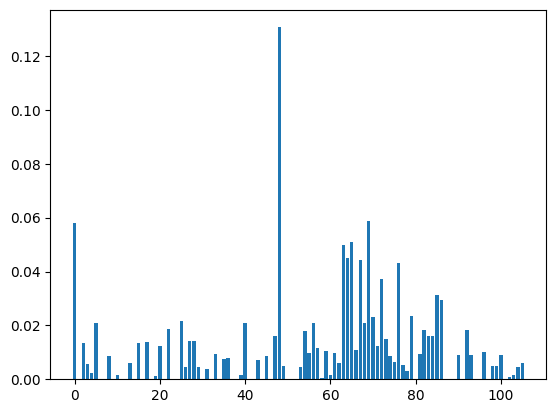

In [106]:
#plot the scores
plt.bar([i for i in range(len(mutual.scores_))], mutual.scores_)
plt.show()

### Correlation Analysis

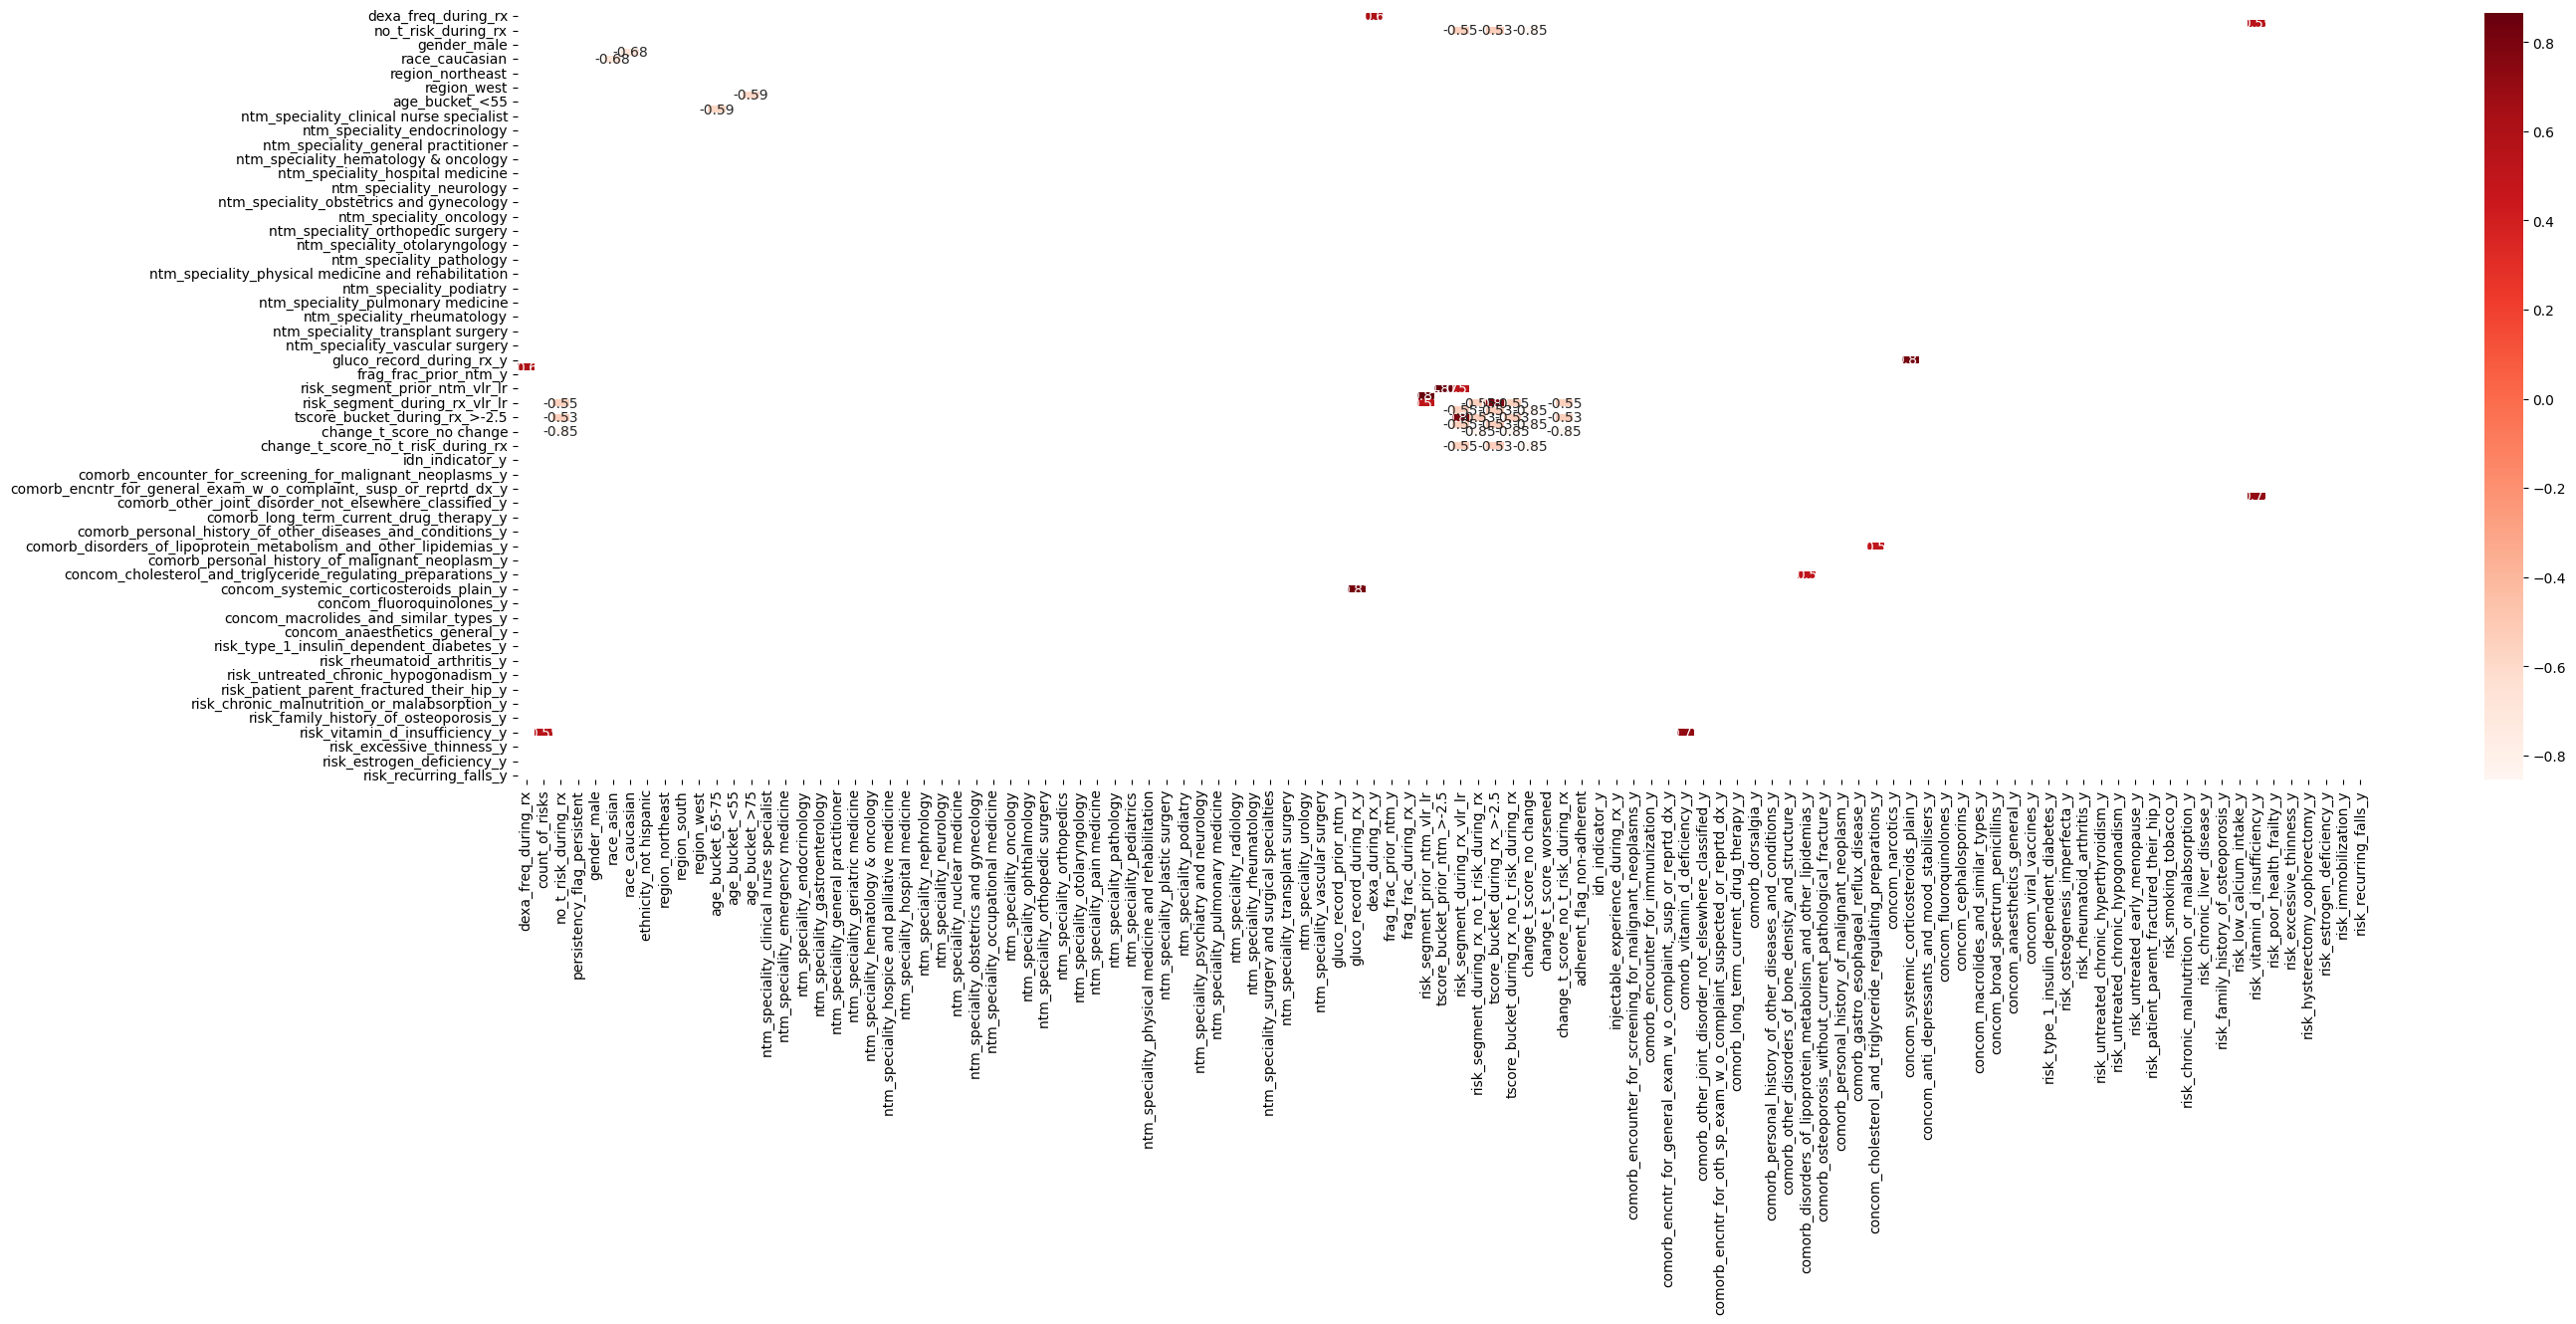

In [107]:
dfCorr = encoded_df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [108]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(encoded_df, .5)

change_t_score_no change                                           tscore_bucket_during_rx_no_t_risk_during_rx                     -0.853191
race_asian                                                         race_caucasian                                                  -0.680355
age_bucket_65-75                                                   age_bucket_>75                                                  -0.585282
change_t_score_no_t_risk_during_rx                                 risk_segment_during_rx_vlr_lr                                   -0.549111
                                                                   tscore_bucket_during_rx_>-2.5                                   -0.530910
comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias_y  concom_cholesterol_and_triglyceride_regulating_preparations_y    0.503266
risk_segment_prior_ntm_vlr_lr                                      risk_segment_during_rx_vlr_lr                                    0.514793
risk_vitamin_

### Quantitative Analysis

In [109]:
quantitative_cols = [col for col in df.columns if df[col].value_counts().size > 2]
quantitative_cols

['dexa_freq_during_rx', 'count_of_risks']

''

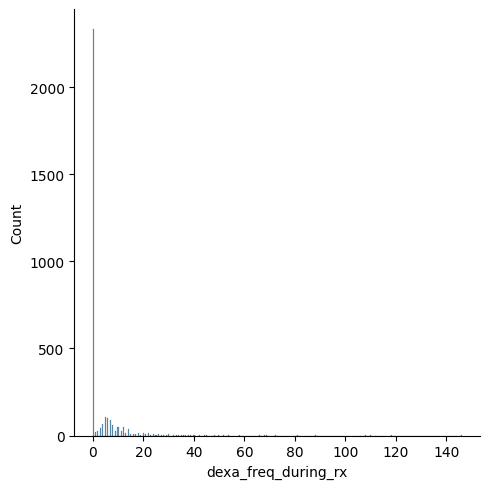

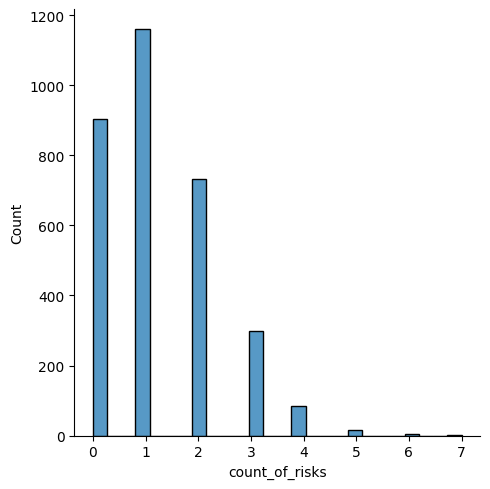

In [110]:
for col in quantitative_cols:
    sns.displot(encoded_df[col])
;